## Feature importance

In [48]:
import numpy as np
import pandas as pd
import pickle
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
import shap
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings(action='ignore', category=UserWarning) 

In [49]:
# Models and data for Oakland

models ='/home/ronaldo/github/smart-cities-pollution/models/models.p'

updated_models = pickle.load(open(models, "rb"))

xgbNO2=updated_models['NO2']
xgbNO=updated_models['NO']

# Data Oakland

data ='/home/ronaldo/github/smart-cities-pollution/models/data.p'

data = pickle.load(open(data, "rb"))

# train
X=data[2][1]['model_data']['X_train']


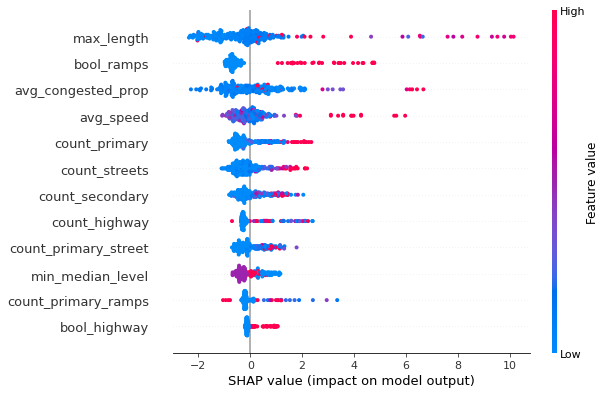

In [50]:
# Shap NO2

explainer_xgbNO2 = shap.TreeExplainer(xgbNO2, X)
shap_values_xgbNO2 = explainer_xgbNO2(X)

shap.plots.beeswarm(shap_values_xgbNO2,max_display=14)

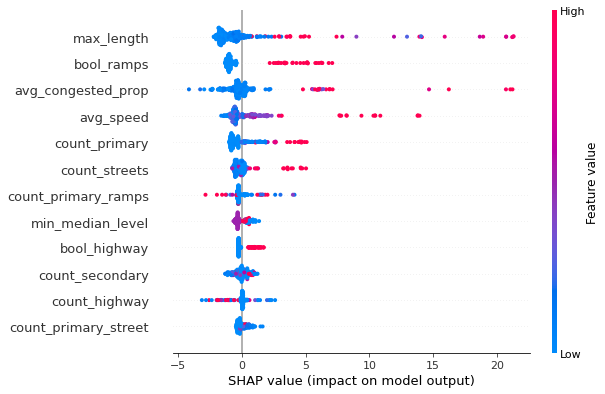

In [51]:
# Shap NO

explainer_xgbNO = shap.TreeExplainer(xgbNO, X)
shap_values_xgbNO = explainer_xgbNO(X)

shap.plots.beeswarm(shap_values_xgbNO,max_display=14)

In [60]:
# columns
col=['avg_congested_prop', 'max_length', 'avg_speed', 'min_median_level',
       'bool_highway', 'bool_ramps', 'count_highway', 'count_streets',
       'count_primary', 'count_secondary', 'count_primary_street',
       'count_primary_ramps']


# X for all stations
df_X=pd.read_csv('/home/ronaldo/github/smart-cities-pollution/data/Waze Data/X_stations.csv')
h3=df_X['h3id']
df_X=df_X[col]

# y for Lima
y_lima=pd.read_csv('/home/ronaldo/github/smart-cities-pollution/data/Lima/lima2019.csv')
# y for Quito
y_quito=pd.read_csv('/home/ronaldo/github/smart-cities-pollution/data/Quito/quito2019.csv')
# y for Xalapa
y_xalapa=pd.read_csv('/home/ronaldo/github/smart-cities-pollution/data/Xalapa/xalapa2019.csv')
# y for Montevideu
y_montevideo=pd.read_csv('/home/ronaldo/github/smart-cities-pollution/data/Montevideo/montevideo2019.csv')
# y for Sao Paulo
y_sp=pd.read_csv('/home/ronaldo/github/smart-cities-pollution/data/Sao Paulo/saopaulo2019.csv')


# Data used in original normalization
dfTemp = pd.DataFrame(columns=col)
dfTemp.loc[0] = data[1][1]['model_data']['scaler-data_min_']
dfTemp.loc[1] =data[1][1]['model_data']['scaler-data_max_']

# Create MaxMin scaler
scaler = MinMaxScaler()
scaler.fit(dfTemp)
x_scaled = scaler.transform(df_X)
df_X = pd.DataFrame(x_scaled)
df_X.columns=col
df_X['h3id']=h3


# Select values Sao Paulo
df_sp=df_X.loc[df_X['h3id'].isin(y_sp['h3id'])]
# Select values Quito
df_quito=df_X.loc[df_X['h3id'].isin(y_quito['h3id'])]
# Select values Montevideu
df_montevideo=df_X.loc[df_X['h3id'].isin(y_montevideo['h3id'])]
# Select values Lima
df_lima=df_X.loc[df_X['h3id'].isin(y_lima['h3id'])]

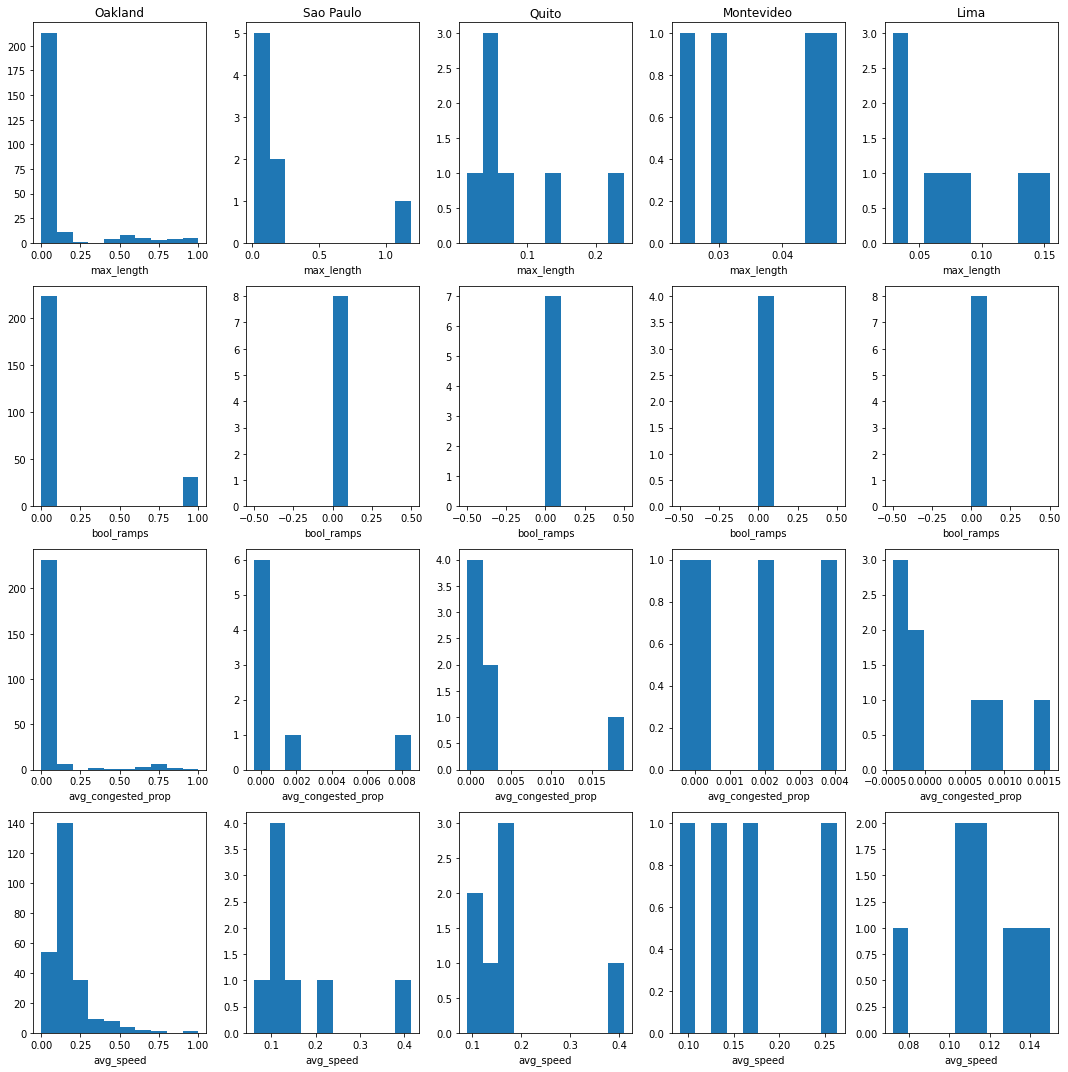

In [77]:
col=['max_length','bool_ramps', 'avg_congested_prop','avg_speed',]

plt.figure(figsize=(15, 15))
j=0
for i,k in enumerate(col):
    
    plt.subplot(4,5,j+(i+1))
    plt.hist(X[k])
    plt.xlabel(k)
    if j==0:
        plt.title('Oakland')
        
    plt.subplot(4,5,j+(i+2))
    plt.hist(df_sp[k])
    plt.xlabel(k)
    if j==0:
        plt.title('Sao Paulo')
        
    plt.subplot(4,5,j+(i+3))
    plt.hist(df_quito[k])
    plt.xlabel(k)
    if j==0:
        plt.title('Quito')
        
    plt.subplot(4,5,j+(i+4))
    plt.hist(df_montevideo[k])
    plt.xlabel(k)
    if j==0:
        plt.title('Montevideo')
        
    plt.subplot(4,5,j+(i+5))
    plt.hist(df_lima[k])
    plt.xlabel(k)
    if j==0:
        plt.title('Lima')
    
    j=j+4 
plt.tight_layout()    

,avg_congested_prop,max_length,avg_speed,min_median_level,bool_highway,bool_ramps,count_highway,count_streets,count_primary,count_secondary,count_primary_street,count_primary_ramps
h3id_9,,,,,,,,,,,,
89283081183ffff,0.054555,0.051845,0.220789,0.00,0.0,0.0,0.000000,0.000803,0.000000,0.020096,0.000092,0.0
89283099d9bffff,0.026917,0.102157,0.189946,0.00,0.0,0.0,0.000000,0.004418,0.000000,0.005627,0.000870,0.0
892830983c7ffff,0.037291,0.035360,0.124921,0.25,0.0,0.0,0.000000,0.004418,0.004767,0.000000,0.000183,0.0
89283099c03ffff,1.000000,0.903726,0.497418,0.25,1.0,0.0,0.008919,0.000000,0.000000,0.000000,0.000000,0.0
8928309837bffff,0.029696,0.060547,0.210079,0.25,0.0,0.0,0.000000,0.000402,0.000000,0.117363,0.000595,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
892830813d7ffff,0.045241,0.040936,0.168262,0.25,0.0,0.0,0.000000,0.004016,0.000000,0.000000,0.000595,0.0
89283098373ffff,0.039076,0.040324,0.131677,0.25,0.0,0.0,0.000000,0.000402,0.000000,0.000000,0.000778,0.0
892830812a3ffff,0.022608,0.043326,0.088280,0.25,0.0,0.0,0.000000,0.020884,0.001059,0.000000,0.000000,0.0
